In [ ]:
#importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from random import randrange
from math import exp

### Data Pre-processing

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data-sets/Bank.csv")
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#customer_id is an unique identifier - changing into an obj

df.customer_id = df.customer_id.astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  object 
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
#checking null values
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
#copying a new dataframe for comparison purposes

bank_df = df.copy()
bank_df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Typically, all data points that are +3 or -3 standard deviations away from the mean of the column are considered outliners

##### I will apply this formula to all of the continous variables to maintain data consistency and validity

In [ ]:
#dropping outliners
#addressing outliners in continous variables
outlined_features = ['credit_score', 'age', 'balance', 'estimated_salary', 'tenure']

#filtering outliners for the credit score column
upper_limit_score = df['credit_score'].mean() + 3 * df['credit_score'].std()
lower_limit_score = df['credit_score'].mean() - 3 * df['credit_score'].std()
bank_df = bank_df[(bank_df['credit_score'] >= lower_limit_score) & (bank_df['credit_score'] <= upper_limit_score)]

#filtering outliners for the age column
upper_limit_age = bank_df['age'].mean() + 3 * bank_df['age'].std()
lower_limit_age = bank_df['age'].mean() - 3 * bank_df['age'].std()
bank_df = bank_df[(bank_df['age'] >= lower_limit_age) & (bank_df['age'] <= upper_limit_age)]

#filtering outliners for the balance column
upper_limit_balance = bank_df['balance'].mean() + 3 * bank_df['balance'].std()
lower_limit_balance = bank_df['balance'].mean() - 3 * bank_df['balance'].std()
bank_df = bank_df[(bank_df['balance'] >= lower_limit_balance) & (bank_df['balance'] <= upper_limit_balance)]

#filtering outliners for estimated salary column
upper_limit_salary = bank_df['estimated_salary'].mean() + 3 * bank_df['estimated_salary'].std()
lower_limit_salary = bank_df['estimated_salary'].mean() - 3 * bank_df['estimated_salary'].std()
bank_df = bank_df[(bank_df['estimated_salary'] >= lower_limit_salary) & (bank_df['estimated_salary'] <= upper_limit_salary)]

#filtering outliners for tenure column
upper_limit_tenure = bank_df['tenure'].mean() + 3 * bank_df['tenure'].std()
lower_limit_tenure = bank_df['tenure'].mean() - 3 * bank_df['tenure'].std()
bank_df = bank_df[(bank_df['tenure'] >= lower_limit_tenure) & (bank_df['tenure'] <= upper_limit_tenure)]


print ("The calculated outliners in the dataset have been successfully handled")

The calculated outliners in the dataset have been successfully handled


### Exploratory Data Analysis

In [ ]:
#visualising data distribution in the column 'credit_score'

df['Status'] = 'Before'
bank_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([df[['credit_score', 'Status']], bank_df[['credit_score', 'Status']]])

fig = px.box(comparison_df, x="Status", y="credit_score", color_discrete_sequence=['green'], points="outliers", title="Credit Score Distribution: Before & After")
fig.show()

In [ ]:
#visualising data distribution in the column 'age'

df['Status'] = 'Before'
bank_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([df[['age', 'Status']], bank_df[['age', 'Status']]])

fig = px.box(comparison_df, x="Status", y="age", color_discrete_sequence=['blue'], points="outliers", title="Age Distribution: Before & After")
fig.show()

In [ ]:
#visualising data distribution in the column 'balance'

df['Status'] = 'Before'
bank_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([df[['balance', 'Status']], bank_df[['balance', 'Status']]])

fig = px.box(comparison_df, x="Status", y="balance", color_discrete_sequence=['red'], points="outliers", title="Bank Balance Distribution: Before & After")
fig.show()

In [ ]:
#visualising data distribution in the column 'salary'

df['Status'] = 'Before'
bank_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([df[['estimated_salary', 'Status']], bank_df[['estimated_salary', 'Status']]])

fig = px.box(comparison_df, x="Status", y="estimated_salary", color_discrete_sequence=['purple'], points="outliers", title="Salary Distribution: Before & After")
fig.show()

In [ ]:
#visualising data distribution in the column 'tenure'

df['Status'] = 'Before'
bank_df['Status'] = 'After'

#combining dataframes to compare
comparison_df = pd.concat([df[['tenure', 'Status']], bank_df[['tenure', 'Status']]])

fig = px.box(comparison_df, x="Status", y="tenure", color_discrete_sequence=['red'], points="outliers", title="Tenure Distribution: Before & After")
fig.show()

In [ ]:
#the percentage of customers that do (1) or do not (0) have a credit card

bank_df.credit_card.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

,proportion
credit_card,
1,70.5%
0,29.5%


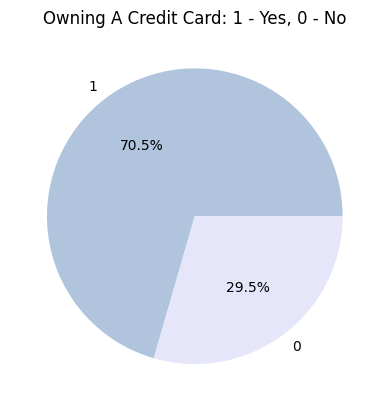

In [ ]:
credit_card_counts = bank_df['credit_card'].value_counts()
credit_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'lavender'])
plt.title('Owning A Credit Card: 1 - Yes, 0 - No')
plt.ylabel('')
plt.show()

In [ ]:
#the percentage of customers that are (1) or aren't (0) an active member of the bank
bank_df.active_member.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

,proportion
active_member,
1,51.0%
0,49.0%


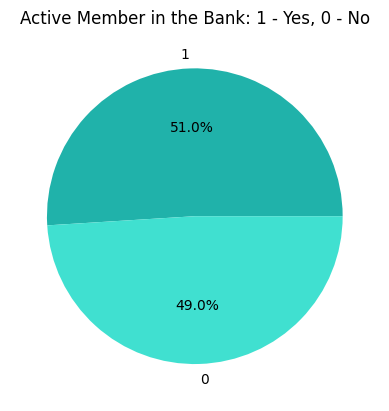

In [ ]:
member_counts = bank_df['active_member'].value_counts()
member_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightseagreen', 'turquoise'])
plt.title('Active Member in the Bank: 1 - Yes, 0 - No')
plt.ylabel('')
plt.show()

In [ ]:
#the percentage of customers that have churned (1) w the bank or not (0)
bank_df.churn.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

,proportion
churn,
0,79.5%
1,20.5%


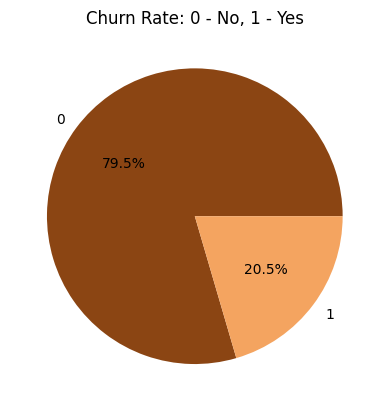

In [ ]:
churn_counts = bank_df['churn'].value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=['saddlebrown', 'sandybrown'])
plt.title('Churn Rate: 0 - No, 1 - Yes')
plt.ylabel('')
plt.show()

In [ ]:
#the percentage of the different types of products across all customers
bank_df.products_number.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

,proportion
products_number,
1,50.8%
2,45.9%
3,2.7%
4,0.6%


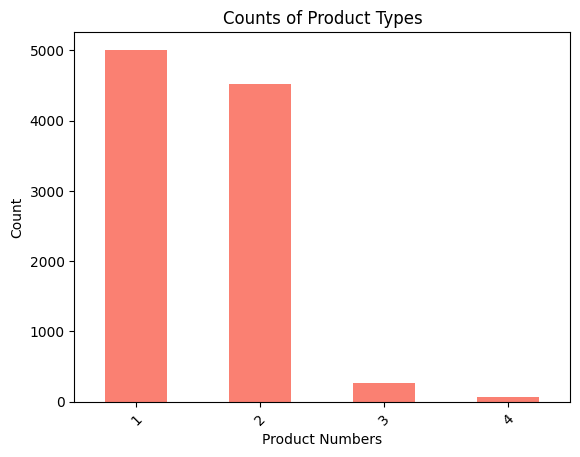

In [ ]:
products_counts = bank_df['products_number'].value_counts()
products_counts.plot(kind='bar', color='salmon')
plt.title('Counts of Product Types')
plt.xlabel('Product Numbers')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [ ]:
#the percentage of the different lengths of tenure across all customers
bank_df.tenure.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

,proportion
tenure,
2,10.5%
1,10.4%
7,10.4%
8,10.3%
3,10.1%
5,10.1%
4,9.9%
9,9.9%
6,9.6%


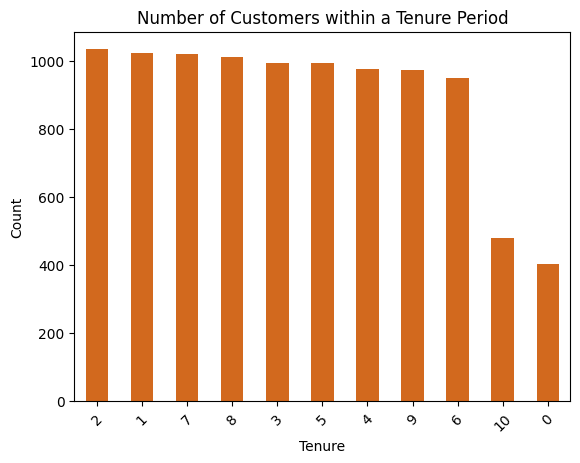

In [ ]:
tenure_counts = bank_df['tenure'].value_counts()
tenure_counts.plot(kind='bar', color= 'chocolate')
plt.title('Number of Customers within a Tenure Period')
plt.xlabel('Tenure')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

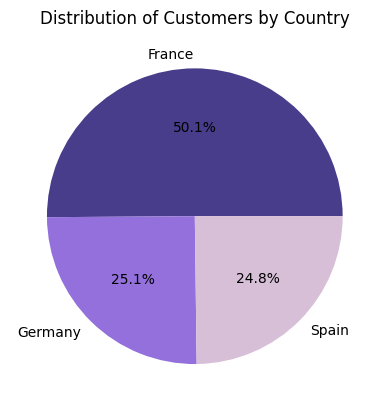

In [ ]:
country_counts = bank_df['country'].value_counts()
country_counts.plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumpurple', 'thistle'])
plt.title('Distribution of Customers by Country')
plt.ylabel('')
plt.show()

### Preparing data for the models

In [ ]:
#encoding country column's values for model building and visualisation

mapped_countries = {country: idx for idx, country in enumerate(bank_df['country'].unique())}
bank_df['country_encoded'] = bank_df['country'].map(mapped_countries)
print(mapped_countries)

{'France': 0, 'Spain': 1, 'Germany': 2}


In [ ]:
#encoding gender column's values for model building and visualisation

mapped_gender = {gender: idx for idx, gender in enumerate(bank_df['gender'].unique())}
bank_df['gender_encoded'] = bank_df['gender'].map(mapped_gender)
print(mapped_gender)

{'Female': 0, 'Male': 1}


##### Calculating Correlation Co-Coefficients - Pearsons

The formula for Pearsons's Correlation Co-efficient is as followed:

$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2  \sum_{i=1}^{n}(y_i - \overline{y})^2}}$

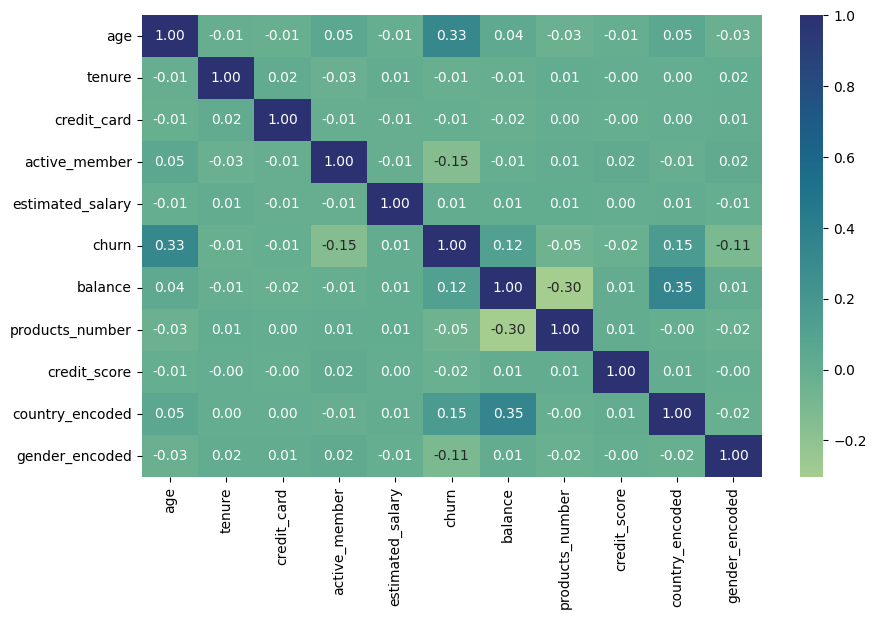

In [ ]:
#visualise the correlation co-efficiencies of the dataframe
#defining plot size
plt.figure(figsize=(10, 6))
columns_corr = ['age', 'tenure', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'balance', 'products_number', 'credit_score', 'country_encoded', 'gender_encoded']
correlated_data = bank_df[columns_corr]
c = correlated_data.corr(method='pearson')
sns.heatmap(c,cmap="crest", annot=True, fmt=".2f")
plt.show()

In [ ]:
# normalise feature variables for model
set_1 = ['age', 'tenure', 'credit_card', 'active_member', 'estimated_salary', 'balance', 'products_number', 'credit_score']
features_1 = bank_df[set_1]
#normalising the data using numpy norm
features_1_norm = features_1 / np.linalg.norm(features_1, axis=0)

In [ ]:
features_1_norm.head(5)

,age,tenure,credit_card,active_member,estimated_salary,balance,products_number,credit_score
0,0.010674,0.003481,0.011993,0.014104,0.008845,0.000000,0.00615,0.009479
1,0.010420,0.001740,0.000000,0.014104,0.009822,0.008545,0.00615,0.009310
2,0.010674,0.013922,0.011993,0.000000,0.009943,0.016279,0.01845,0.007687
3,0.009912,0.001740,0.000000,0.000000,0.008189,0.000000,0.01230,0.010704
4,0.010928,0.003481,0.011993,0.014104,0.006902,0.012797,0.00615,0.013016


In [ ]:
#adding the country encoded column to the normalised df
features_1_norm['country_encoded'] = bank_df['country_encoded']

In [ ]:
#adding the gender encoded column to the normalised df
features_1_norm['gender_encoded'] = bank_df['gender_encoded']

In [ ]:
#review stats before and after normalisation

bank_df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
count,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000
mean,650.604930,38.428847,5.013287,76577.720217,1.530581,0.705244,0.509889,100058.172187,0.204686,0.749873,0.546404
std,96.366882,9.673692,2.891198,62390.387538,0.582208,0.455956,0.499928,57494.389513,0.403493,0.830367,0.497867
min,363.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100137.700000,0.000000,0.000000,1.000000
75%,718.000000,43.000000,7.000000,127661.075000,2.000000,1.000000,1.000000,149370.170000,0.000000,2.000000,1.000000
max,850.000000,70.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,2.000000,1.000000


In [ ]:
features_1_norm.describe()

,age,tenure,credit_card,active_member,estimated_salary,balance,products_number,credit_score,country_encoded,gender_encoded
count,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000
mean,0.009767,0.008725,0.008458,0.007192,0.008732,0.007808,0.009413,0.009963,0.749873,0.546404
std,0.002459,0.005031,0.005468,0.007051,0.005018,0.006361,0.003581,0.001476,0.830367,0.497867
min,0.004575,0.000000,0.000000,0.000000,0.000001,0.000000,0.006150,0.005559,0.000000,0.000000
25%,0.008133,0.005221,0.000000,0.000000,0.004450,0.000000,0.006150,0.008943,0.000000,0.000000
50%,0.009403,0.008701,0.011993,0.014104,0.008739,0.009923,0.006150,0.009984,0.000000,1.000000
75%,0.010928,0.012182,0.011993,0.014104,0.013036,0.013017,0.012300,0.010995,2.000000,1.000000
max,0.017790,0.017403,0.011993,0.014104,0.017454,0.025582,0.024601,0.013016,2.000000,1.000000


# Model Building

## Set 1 Variables Allocation

### Target Variable: Churn

#### Feature Variables: Credit Score, Product Number, Balance, Estimated Salary, Active Member, Tenure, Age, Country, Gender, Credit Score

#### Customer ID is not included, as it is an unique identifier for each customer and does not contribute to the model's performance or analysis

In [ ]:
#defining X and y
target = bank_df['churn']
X = features_1_norm.values
y = target.values

#combining X and y into a single dataset
data = np.column_stack((X, y))  #stack X and y into a single array

#### Logistic Regression with Gradient Descent

$\sigma(z) = \frac{1} {1 + e^{-z}}$


In [ ]:
#defining the cross validation method for logistic regression
def cv_split(data, n_folds):
    """
    This function splits the data into a specified number of folds for cross-validation.

    Parameters:
        data (np.ndarray): The dataset that needs to be split into folds.
        n_folds (int): The number of folds to create.

    Returns:
        list: A list of n_folds subsets.
    """
    data_split = []
    data_copy = data.copy()
    fold_size = len(data) // n_folds
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(data_copy))
            fold.append(data_copy[index])
            data_copy = np.delete(data_copy, index, axis=0)
        data_split.append(np.array(fold))
    return data_split

In [ ]:
#evaluation metrics - accuracy (logistic regression)
def accuracy(confirmed, predicted):
    """
    This function calculates the accuracy of predictions, pertaining to the true labels.

    Parameters:
        confirmed (np.ndarray): The true labels.
        predicted (np.ndarray): The predicted labels.

    Returns:
        float: The accuracy value as a percentage.
    """
    correct = np.sum(confirmed == predicted)
    return (correct / len(confirmed)) * 100

In [ ]:
#evaluation metrics - precision (logistic regression)
def precision(confirmed, predicted):
    """
    This function calculates the precision of predictions.

    Parameters:
        confirmed (np.ndarray): The true labels.
        predicted (np.ndarray): The predicted labels.

    Returns:
        float: The precision as a percentage.
    """
    true_positive = np.sum((predicted == 1) & (confirmed == 1))
    false_positive = np.sum((predicted == 1) & (confirmed == 0))
    if true_positive + false_positive == 0:
        return 0.0
    return (true_positive / (true_positive + false_positive)) * 100

##### First Attempt

In [ ]:
def eval_algo(data, algorithm, n_folds, *args):
    """
    This function evaluates an algorithm (logistic regression) using cross-validation.

    Parameters:
        data (np.ndarray): The dataset to be used.
        algorithm (function): The algorithm to evaluate (in this case, logistic regression).
        n_folds (int): The number of folds for cross-validation.
        *args: Additional arguments required by the algorithm.

    Returns:
        list: A list of accuracy scores for each fold.
    """
    folds = cv_split(data, n_folds)
    scores = []
    for fold in folds:
        train_set = np.vstack([f for f in folds if not np.array_equal(f, fold)])
        test_set = fold
        test_labels = test_set[:, -1]  #separating the true labels
        test_features = test_set[:, :-1]  #separating the features
        predicted = algorithm(train_set, test_features, *args)
        accuracy_m = accuracy(test_labels, predicted)
        precision_m = precision(test_labels, predicted)
        print(f"Fold Accuracy: {accuracy_m:.2f}%, Precision: {precision_m:.2f}%")
        scores.append(accuracy_m)
    return scores

def prediction(row, coefficients):
    """
    This function makes a prediction using logistic regression.

    Parameters:
        row (np.ndarray): A single data sample (features only).
        coefficients (np.ndarray): The logistic regression coefficients.

    Returns:
        float: The predicted probability.
    """
    yhat = coefficients[0] + np.dot(row, coefficients[1:])
    return 1.0 / (1.0 + np.exp(-yhat)) #sigmoid function

def coefficients_SGD(train, l_rate, n_epoch):
    """
    This function estimates logistic regression coefficients using 'Stochastic Gradient Descent'.

    Parameters:
        train (np.ndarray): The training data values.
        l_rate (float): The learning rate.
        n_epoch (int): The number of epochs.

    Returns:
        np.ndarray: The estimated coefficients.
    """
    features = train[:, :-1]
    labels = train[:, -1]
    coef = np.zeros(features.shape[1] + 1)  #initialising coefficients
    for _ in range(n_epoch):
        for i in range(len(features)):
            yhat = prediction(features[i], coef)
            error = labels[i] - yhat
            coef[0] += l_rate * error * yhat * (1 - yhat)
            coef[1:] += l_rate * error * yhat * (1 - yhat) * features[i]
    return coef

def logistic_regression(train, test, l_rate, n_epoch):
    """
    This function implements logistic regression using coefficients obtained from SGD.

    Parameters:
        train (np.ndarray): The training data values.
        test (np.ndarray): The testing data values.
        l_rate (float): The learning rate.
        n_epoch (int): The number of epochs.

    Returns:
        np.ndarray: NumPy array of predicted labels (0 or 1).
    """
    coef = coefficients_SGD(train, l_rate, n_epoch)
    predictions = []
    for row in test:
        yhat = prediction(row, coef)
        predictions.append(round(yhat))
    return np.array(predictions)


In [ ]:
scores = eval_algo(data, logistic_regression, 5, 0.1, 100)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 79.60%, Precision: 0.00%
Fold Accuracy: 79.76%, Precision: 0.00%
Fold Accuracy: 79.45%, Precision: 0.00%
Fold Accuracy: 79.91%, Precision: 0.00%
Fold Accuracy: 78.94%, Precision: 0.00%
Cross-validation scores: [79.60426179604262, 79.75646879756468, 79.45205479452055, 79.90867579908677, 78.94469812278031]


In [ ]:
scores1 = eval_algo(data, logistic_regression, 5, 0.1, 125)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 79.05%, Precision: 0.00%
Fold Accuracy: 79.30%, Precision: 0.00%
Fold Accuracy: 80.11%, Precision: 0.00%
Fold Accuracy: 79.81%, Precision: 0.00%
Fold Accuracy: 79.40%, Precision: 0.00%
Cross-validation scores: [79.60426179604262, 79.75646879756468, 79.45205479452055, 79.90867579908677, 78.94469812278031]


##### Second Attempt

From our EDA, we can see there is a major class imbalance in the target variable, to rectify this, we will implement a weighted loss function to yield more efficient results

In [ ]:
def eval_algo(data, algorithm, n_folds, *args):
    """
    This function evaluates an algorithm (logistic regression) using cross-validation.

    Parameters:
        data (np.ndarray): The dataset to be used.
        algorithm (function): The algorithm to evaluate (in this case, logistic regression).
        n_folds (int): The number of folds for cross-validation.
        *args: Additional arguments required by the algorithm.

    Returns:
        list: A list of accuracy scores for each fold.
    """
    folds = cv_split(data, n_folds)
    scores = []
    for fold in folds:
        train_set = np.vstack([f for f in folds if not np.array_equal(f, fold)])
        test_set = fold
        test_labels = test_set[:, -1]  # Separate true labels
        test_features = test_set[:, :-1]  # Separate features
        predicted = algorithm(train_set, test_features, *args)
        accuracy_m = accuracy(test_labels, predicted)
        precision_m = precision(test_labels, predicted)
        print(f"Fold Accuracy: {accuracy_m:.2f}%, Precision: {precision_m:.2f}%")
        scores.append(accuracy_m)
    return scores

def prediction(row, coefficients):
    """
    This function makes a prediction using logistic regression.

    Parameters:
        row (np.ndarray): A single data sample (features only).
        coefficients (np.ndarray): The logistic regression coefficients.

    Returns:
        float: The predicted probability.
    """
    yhat = coefficients[0] + np.dot(row, coefficients[1:])
    return 1.0 / (1.0 + np.exp(-yhat)) #sigmoid function

## IMPLEMENTED CHANGE
def coefficients_SGD(train, l_rate, n_epoch):
    """
    This function estimates logistic regression coefficients using stochastic gradient descent with class weighting.

    Parameters:
        train (np.ndarray): The training dataset.
        l_rate (float): The learning rate.
        n_epoch (int): The number of epochs.

    Returns:
        np.ndarray: The estimated coefficients.
    """
    features = train[:, :-1]
    labels = train[:, -1]
    coef = np.zeros(features.shape[1] + 1)  #initialising co-efficients

    #Calculating class weights
    class_counts = np.bincount(labels.astype(int))  #holds the counts of instances of each class
    total_samples = len(labels)
    class_weights = total_samples / (len(class_counts) * class_counts)  #performs inverse frequency weighting

    for _ in range(n_epoch):
        for i in range(len(features)):
            yhat = prediction(features[i], coef)
            error = labels[i] - yhat
            weight = class_weights[int(labels[i])]  #applies class-specific weights
            coef[0] += l_rate * weight * error * yhat * (1 - yhat)
            coef[1:] += l_rate * weight * error * yhat * (1 - yhat) * features[i]
    return coef


def logistic_regression(train, test, l_rate, n_epoch):
    """
    This function implement logistic regression using coefficients obtained from SGD.

    Parameters:
        train (np.ndarray): The training data.
        test (np.ndarray): The testing data.
        l_rate (float): The learning rate.
        n_epoch (int): The number of epochs.

    Returns:
        np.ndarray: A NumPy array of predicted labels (0 or 1).
    """
    coef = coefficients_SGD(train, l_rate, n_epoch)
    predictions = []
    for row in test:
        yhat = prediction(row, coef)
        predictions.append(round(yhat))
    return np.array(predictions)

In [ ]:
scores = eval_algo(data, logistic_regression, 5, 0.1, 100)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 61.09%, Precision: 28.59%
Fold Accuracy: 60.88%, Precision: 28.93%
Fold Accuracy: 61.69%, Precision: 30.63%
Fold Accuracy: 60.58%, Precision: 29.91%
Fold Accuracy: 58.04%, Precision: 27.80%
Cross-validation scores: [61.085743277524095, 60.882800608828006, 61.694571283612376, 60.57838660578386, 58.0416032470827]


In [ ]:
scores1 = eval_algo(data, logistic_regression, 5, 0.1, 125)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 59.77%, Precision: 27.98%
Fold Accuracy: 57.94%, Precision: 27.16%
Fold Accuracy: 56.52%, Precision: 29.29%
Fold Accuracy: 56.87%, Precision: 27.16%
Fold Accuracy: 52.61%, Precision: 27.81%
Cross-validation scores: [61.085743277524095, 60.882800608828006, 61.694571283612376, 60.57838660578386, 58.0416032470827]


#### K-Nearest Neighbour Algorithm
##### Euclidean Distance is used within this calculation

$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $

In [ ]:
#evaluation metrics - accuracy (knn)
def compute_accuracy_knn(y_true, y_pred):
    """
    This function computes accuracy as the proportion of correctly predicted labels.

    Parameters:
    - y_true: NumPy array of true class labels.
    - y_pred: NumPy array of predicted class labels.

    Returns:
    - Accuracy as a float.
    """
    return np.mean(y_true == y_pred)

In [ ]:
#evaluation metrics - precision (knn)
def compute_precision_knn(y_true, y_pred):
    """
    This function computes precision as the proportion of true positives among predicted positives.

    Parameters:
    - y_true: NumPy array of true class labels.
    - y_pred: NumPy array of predicted class labels.

    Returns:
    - Precision as a float.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

In [ ]:
def knn_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbours):
    """
    This function implements K-Nearest Neighbors classification.

    Parameters:
    - testing_inputs: A NumPy array of input samples used for testing.
    - training_inputs: A NumPy array of data points for which the classification is known.
    - training_outputs: A NumPy array of class labels for 'training_inputs' data
    - no_of_neighbours: Number of nearest neighbors to consider (k).

    Returns:
    - predictions: NumPy array of predicted class labels for testing_inputs.
    """
    predictions = []

    for test_point in testing_inputs:
     #calculating the pairwise distances between the test point and all training points
        distances = np.sqrt(np.sum((training_inputs - test_point) ** 2, axis=1)) #euclidean distance

        #sorting the pairwise distances and get indices of the k closest neighbors
        k_indices = np.argsort(distances)[:no_of_neighbours]

        #evaluating the labels of the closest k points
        k_labels = training_outputs[k_indices]

        #assigning the class label that appears most frequently among the k closest points
        unique_labels, counts = np.unique(k_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        predictions.append(majority_label)

    return np.array(predictions)


def cross_validate_knn(data, n_folds, k):
    """
    This function performs cross-validation for KNN and computes accuracy and precision for each fold.

    Parameters:
    - data: NumPy array where the last column contains the labels.
    - n_folds: Number of folds for cross-validation.
    - k: Number of neighbors for KNN.

    Returns:
    - List of accuracy scores and precision scores for each fold.
    """
    #splitting the data into folds
    folds = cv_split(data, n_folds)
    accuracy_scores = []
    precision_scores = []

    for i in range(n_folds):
        #separate one fold as the test set, and the rest as the training set
        test_set = folds[i]
        train_set = np.vstack([folds[j] for j in range(n_folds) if j != i])

        #split the features and labels
        X_train, y_train = train_set[:, :-1], train_set[:, -1]
        X_test, y_test = test_set[:, :-1], test_set[:, -1]

        #applying KNN
        y_pred = knn_classification(X_test, X_train, y_train, no_of_neighbours=k)

        #computing metrics
        accuracy = compute_accuracy_knn(y_test, y_pred)
        precision = compute_precision_knn(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)

    return accuracy_scores, precision_scores

In [ ]:
#using different levels of parameters

#Parameters for KNN
k = 8
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.82 0.82 0.84 0.83 0.82]
Cross-Validation Precision Scores: [0.66 0.67 0.75 0.69 0.7 ]
Mean Accuracy: 0.82
Mean Precision: 0.69


In [ ]:
#Parameters for KNN
k = 10
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.82 0.81 0.82 0.84 0.82]
Cross-Validation Precision Scores: [0.71 0.7  0.63 0.72 0.66]
Mean Accuracy: 0.82
Mean Precision: 0.68


In [ ]:
#Parameters for KNN
k = 12
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.82 0.82 0.82 0.82 0.83]
Cross-Validation Precision Scores: [0.7  0.74 0.66 0.72 0.66]
Mean Accuracy: 0.82
Mean Precision: 0.70


In [ ]:
#Parameters for KNN
k = 14
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.82 0.83 0.81 0.81 0.83]
Cross-Validation Precision Scores: [0.79 0.78 0.62 0.61 0.6 ]
Mean Accuracy: 0.82
Mean Precision: 0.68


## Set 2 Variables Allocation

### Target Variable: Churn

#### Feature Variables: Credit Card, Estimated Salary, Active Member, Tenure, Age, Country (looking at the features within the dataset with the highest positive correlation)

#### Customer ID is not included, as it is an unique identifier for each customer and does not contribute to the model's performance or data analysis

In [ ]:
# normalise feature variables
set_2 = ['age', 'tenure', 'credit_card', 'estimated_salary', 'balance']
features_2 = bank_df[set_2]
#normalising the selected values using numpy norm
features_2_norm = features_2 / np.linalg.norm(features_2, axis=0)

In [ ]:
features_2_norm.head(5)

,age,tenure,credit_card,estimated_salary,balance
0,0.010674,0.003481,0.011993,0.008845,0.000000
1,0.010420,0.001740,0.000000,0.009822,0.008545
2,0.010674,0.013922,0.011993,0.009943,0.016279
3,0.009912,0.001740,0.000000,0.008189,0.000000
4,0.010928,0.003481,0.011993,0.006902,0.012797


In [ ]:
features_2_norm['country_encoded'] = bank_df['country_encoded']
features_2_norm.head(5)

,age,tenure,credit_card,estimated_salary,balance,country_encoded
0,0.010674,0.003481,0.011993,0.008845,0.000000,0
1,0.010420,0.001740,0.000000,0.009822,0.008545,1
2,0.010674,0.013922,0.011993,0.009943,0.016279,0
3,0.009912,0.001740,0.000000,0.008189,0.000000,0
4,0.010928,0.003481,0.011993,0.006902,0.012797,1


In [ ]:
#defining x and y values
target = bank_df['churn']
X = features_2_norm.values
y = target.values

# Combine X and y into a single dataset
data = np.column_stack((X, y))  # Stack X and y into a single array

#### Logistic Regression with Gradient Descent

$\sigma(z) = \frac{1} {1 + e^{-z}}$


In [ ]:
#defining the cross validation method for logistic regression
def cv_split(data, n_folds):
    data_split = []
    data_copy = data.copy()
    fold_size = len(data) // n_folds
    for _ in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(data_copy))
            fold.append(data_copy[index])
            data_copy = np.delete(data_copy, index, axis=0)
        data_split.append(np.array(fold))
    return data_split

In [ ]:
#evaluation metrics - accuracy (logistic regression)
def accuracy(confirmed, predicted):
    correct = np.sum(confirmed == predicted)
    return (correct / len(confirmed)) * 100

In [ ]:
#evaluation metrics - precision (logistic regression)
def precision(confirmed, predicted):
    true_positive = np.sum((predicted == 1) & (confirmed == 1))
    false_positive = np.sum((predicted == 1) & (confirmed == 0))
    if true_positive + false_positive == 0:
        return 0.0
    return (true_positive / (true_positive + false_positive)) * 100

#### First Attempt

In [ ]:
def eval_algo(data, algorithm, n_folds, *args):
    folds = cv_split(data, n_folds)
    scores = []
    for fold in folds:
        train_set = np.vstack([f for f in folds if not np.array_equal(f, fold)])
        test_set = fold
        test_labels = test_set[:, -1]
        test_features = test_set[:, :-1]
        predicted = algorithm(train_set, test_features, *args)
        accuracy_m = accuracy(test_labels, predicted)
        precision_m = precision(test_labels, predicted)
        print(f"Fold Accuracy: {accuracy_m:.2f}%, Precision: {precision_m:.2f}%")
        scores.append(accuracy_m)
    return scores

def prediction(row, coefficients):
    yhat = coefficients[0] + np.dot(row, coefficients[1:])
    return 1.0 / (1.0 + np.exp(-yhat))

def coefficients_SGD(train, l_rate, n_epoch):
    features = train[:, :-1]
    labels = train[:, -1]
    coef = np.zeros(features.shape[1] + 1)
    for _ in range(n_epoch):
        for i in range(len(features)):
            yhat = prediction(features[i], coef)
            error = labels[i] - yhat
            coef[0] += l_rate * error * yhat * (1 - yhat)
            coef[1:] += l_rate * error * yhat * (1 - yhat) * features[i]
    return coef

def logistic_regression(train, test, l_rate, n_epoch):
    coef = coefficients_SGD(train, l_rate, n_epoch)
    predictions = []
    for row in test:
        yhat = prediction(row, coef)
        predictions.append(round(yhat))
    return np.array(predictions)

In [ ]:
scores = eval_algo(data, logistic_regression, 5, 0.1, 100)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 79.05%, Precision: 0.00%
Fold Accuracy: 78.94%, Precision: 0.00%
Fold Accuracy: 80.11%, Precision: 0.00%
Fold Accuracy: 80.47%, Precision: 0.00%
Fold Accuracy: 79.10%, Precision: 0.00%
Cross-validation scores: [79.04616945712836, 78.94469812278031, 80.11161846778285, 80.46676813800102, 79.09690512430238]


In [ ]:
scores1 = eval_algo(data, logistic_regression, 5, 0.1, 125)
print(f"Cross-validation scores: {scores}")

Fold Accuracy: 80.87%, Precision: 0.00%
Fold Accuracy: 78.34%, Precision: 0.00%
Fold Accuracy: 79.05%, Precision: 0.00%
Fold Accuracy: 80.77%, Precision: 0.00%
Fold Accuracy: 78.59%, Precision: 0.00%
Cross-validation scores: [79.04616945712836, 78.94469812278031, 80.11161846778285, 80.46676813800102, 79.09690512430238]


#### Second Attempt - Class Imbalance

In [ ]:
def eval_algo(data, algorithm, n_folds, *args):
    folds = cv_split(data, n_folds)
    scores = []
    for fold in folds:
        train_set = np.vstack([f for f in folds if not np.array_equal(f, fold)])
        test_set = fold
        test_labels = test_set[:, -1]
        test_features = test_set[:, :-1]
        predicted = algorithm(train_set, test_features, *args)
        accuracy_m = accuracy(test_labels, predicted)
        precision_m = precision(test_labels, predicted)
        print(f"Fold Accuracy: {accuracy_m:.2f}%, Precision: {precision_m:.2f}%")
        scores.append(accuracy_m)
    return scores

def prediction(row, coefficients):
    yhat = coefficients[0] + np.dot(row, coefficients[1:])
    return 1.0 / (1.0 + np.exp(-yhat))

## IMPLEMENTED CHANGE
def coefficients_SGD(train, l_rate, n_epoch):
    features = train[:, :-1]
    labels = train[:, -1]
    coef = np.zeros(features.shape[1] + 1)
    class_counts = np.bincount(labels.astype(int))
    total_samples = len(labels)
    class_weights = total_samples / (len(class_counts) * class_counts)

    for _ in range(n_epoch):
        for i in range(len(features)):
            yhat = prediction(features[i], coef)
            error = labels[i] - yhat
            weight = class_weights[int(labels[i])]
            coef[0] += l_rate * weight * error * yhat * (1 - yhat)
            coef[1:] += l_rate * weight * error * yhat * (1 - yhat) * features[i]
    return coef


def logistic_regression(train, test, l_rate, n_epoch):
    coef = coefficients_SGD(train, l_rate, n_epoch)
    predictions = []
    for row in test:
        yhat = prediction(row, coef)
        predictions.append(round(yhat))
    return np.array(predictions)

In [ ]:
scores = eval_algo(data, logistic_regression, 5, 0.1, 100)
print(f"Cross Validation Scores: {scores}")

Fold Accuracy: 54.49%, Precision: 26.62%
Fold Accuracy: 56.11%, Precision: 27.59%
Fold Accuracy: 53.42%, Precision: 23.27%
Fold Accuracy: 54.69%, Precision: 23.25%
Fold Accuracy: 79.81%, Precision: 49.65%
Cross Validation Scores: [54.49010654490106, 56.11364789446981, 53.42465753424658, 54.693049213597156, 79.80720446473872]


In [ ]:
scores1 = eval_algo(data, logistic_regression, 5, 0.1, 125)
print(f"Cross Validation Scores: {scores}")

Fold Accuracy: 55.05%, Precision: 26.81%
Fold Accuracy: 55.40%, Precision: 25.31%
Fold Accuracy: 60.17%, Precision: 25.72%
Fold Accuracy: 58.35%, Precision: 25.40%
Fold Accuracy: 55.71%, Precision: 26.43%
Cross Validation Scores: [54.49010654490106, 56.11364789446981, 53.42465753424658, 54.693049213597156, 79.80720446473872]


#### K-Nearest Neighbour Algorithm
##### Euclidean Distance is used within this calculation

$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $

In [ ]:
#evaluation metrics - accuracy (knn)
def compute_accuracy_knn(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
#evaluation metrics - precision (knn)
def compute_precision_knn(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

In [ ]:
def knn_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbours):

    predictions = []
    for test_point in testing_inputs:
        distances = np.sqrt(np.sum((training_inputs - test_point) ** 2, axis=1))

        k_indices = np.argsort(distances)[:no_of_neighbours]

        k_labels = training_outputs[k_indices]

        unique_labels, counts = np.unique(k_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        predictions.append(majority_label)

    return np.array(predictions)

def cross_validate_knn(data, n_folds, k):
    folds = cv_split(data, n_folds)
    accuracy_scores = []
    precision_scores = []

    for i in range(n_folds):
        test_set = folds[i]
        train_set = np.vstack([folds[j] for j in range(n_folds) if j != i])

        X_train, y_train = train_set[:, :-1], train_set[:, -1]
        X_test, y_test = test_set[:, :-1], test_set[:, -1]

        y_pred = knn_classification(X_test, X_train, y_train, no_of_neighbours=k)

        accuracy = compute_accuracy_knn(y_test, y_pred)
        precision = compute_precision_knn(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)

    return accuracy_scores, precision_scores

In [ ]:
#using different levels of parameters

#Parameters for KNN
k = 8
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.81 0.8  0.81 0.8  0.8 ]
Cross-Validation Precision Scores: [0.63 0.47 0.56 0.59 0.6 ]
Mean Accuracy: 0.80
Mean Precision: 0.57


In [ ]:
#using different levels of parameters

#Parameters for KNN
k = 10
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.79 0.82 0.81 0.79 0.81]
Cross-Validation Precision Scores: [0.5  0.58 0.58 0.58 0.57]
Mean Accuracy: 0.80
Mean Precision: 0.56


In [ ]:
#using different levels of parameters

#Parameters for KNN
k = 12
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.82 0.8  0.8  0.81 0.81]
Cross-Validation Precision Scores: [0.61 0.53 0.6  0.56 0.7 ]
Mean Accuracy: 0.81
Mean Precision: 0.60


In [ ]:
#using different levels of parameters

#Parameters for KNN
k = 14
n_folds = 5

#performing cross validation
accuracy_scores, precision_scores = cross_validate_knn(data, n_folds, k)


accuracy_scores_rounded = np.round(accuracy_scores, 2)
precision_scores_rounded = np.round(precision_scores, 2)

print(f"Cross-Validation Accuracy Scores: {accuracy_scores_rounded}")
print(f"Cross-Validation Precision Scores: {precision_scores_rounded}")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f}")
print(f"Mean Precision: {np.mean(precision_scores):.2f}")

Cross-Validation Accuracy Scores: [0.8  0.81 0.8  0.82 0.81]
Cross-Validation Precision Scores: [0.61 0.65 0.54 0.61 0.6 ]
Mean Accuracy: 0.81
Mean Precision: 0.60
